<a href="https://colab.research.google.com/github/josephmhernandez/Deep-Learning/blob/master/classifyingNewswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import reuters
from keras import models
from keras import layers
from keras.utils import to_categorical

import numpy as np

from keras.utils.np_utils import to_categorical


In [0]:
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [26]:
#Load the dataset. 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print('len(train_data):', len(train_data))
print('length test data:', len(test_data))

len(train_data): 8982
length test data: 2246


In [0]:
#Preprosses data. 
def vectorize_sequences(seq, dimension=10000):
  results = np.zeros((len(seq), dimension))
  for i, ss in enumerate(seq):
    results[i, ss] = 1

  return results

In [0]:
from keras.utils.np_utils import to_categorical
#Preprocess data. 
#can also switch to to_categorical() built into keras
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_test_labels = to_categorical(test_labels)
one_hot_train_labels = to_categorical(train_labels)


In [0]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [30]:
model.compile(optimizer= 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

#Setting apart 1,000 samples in the training data to use as a validation set.
x_val = x_train[:1000]
print(len(x_train))
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]




8982


In [31]:
print(len(partial_x_train))
print(len(partial_y_train))

print(len(x_val))
print(len(y_val))

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))



7982
7982
1000
1000
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 97us/step - loss: 2.6239 - acc: 0.5352 - val_loss: 1.7413 - val_acc: 0.6470
Epoch 2/20
7982/7982 [==============================] - 0s 54us/step - loss: 1.4054 - acc: 0.7090 - val_loss: 1.2960 - val_acc: 0.7320
Epoch 3/20
7982/7982 [==============================] - 0s 57us/step - loss: 1.0342 - acc: 0.7818 - val_loss: 1.1290 - val_acc: 0.7500
Epoch 4/20
7982/7982 [==============================] - 0s 54us/step - loss: 0.8127 - acc: 0.8282 - val_loss: 1.0293 - val_acc: 0.7850
Epoch 5/20
7982/7982 [==============================] - 0s 54us/step - loss: 0.6493 - acc: 0.8613 - val_loss: 0.9724 - val_acc: 0.7990
Epoch 6/20
7982/7982 [==============================] - 0s 52us/step - loss: 0.5172 - acc: 0.8944 - val_loss: 0.9590 - val_acc: 0.8000
Epoch 7/20
7982/7982 [==============================] - 0s 55us/step - loss: 0.4191 - acc: 0.9146 - val_loss: 0.9189 - val

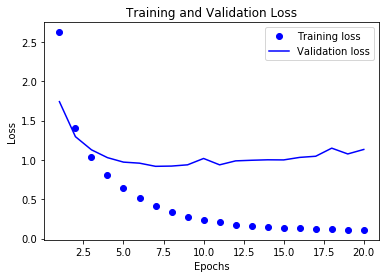

In [32]:
#plot: 
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

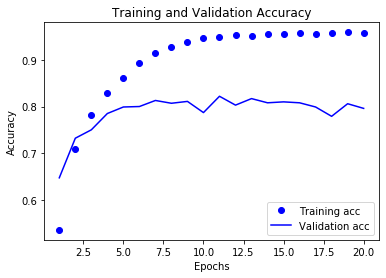

In [33]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [34]:
#Retraining the model from scratch with only 9 epochs. (Tuned hyperparameters)

model = models.Sequential()
model.add(layers.Dense(64, input_shape=(10000,), activation = 'relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 95us/step - loss: 2.7754 - acc: 0.5003 - val_loss: 1.8898 - val_acc: 0.6120
Epoch 2/9
7982/7982 [==============================] - 0s 54us/step - loss: 1.5248 - acc: 0.6768 - val_loss: 1.3694 - val_acc: 0.6990
Epoch 3/9
7982/7982 [==============================] - 0s 55us/step - loss: 1.1092 - acc: 0.7667 - val_loss: 1.1606 - val_acc: 0.7550
Epoch 4/9
7982/7982 [==============================] - 0s 54us/step - loss: 0.8659 - acc: 0.8220 - val_loss: 1.0480 - val_acc: 0.7790
Epoch 5/9
7982/7982 [==============================] - 0s 54us/step - loss: 0.6971 - acc: 0.8557 - val_loss: 0.9859 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 0s 53us/step - loss: 0.5521 - acc: 0.8866 - val_loss: 0.9448 - val_acc: 0.8010
Epoch 7/9
7982/7982 [==============================] - 0s 55us/step - loss: 0.4483 - acc: 0.9059 - val_loss: 0.9077 - val_acc: 0.8130
Epoch 8/9
7982

In [35]:
results

[1.0058755734512452, 0.783615316064466]

In [0]:
#Results of ~ 79% are statistically significant because a random classifier wouldn't come close to these numbers. 
#
#Take aways from this example: 
# """
# - If you're trying to classify data points to N classes the last layer of your network should have a dense layer of size N. 
# - In a single-label, multiclass problem, the last layer should be a sftmax activation so it will output a distribution of probabilities. 
# - You should almost always choose categorical crossentropy as your loss function because it minimizes the distance betwween the probability distributions output
#     by the network and the true distribution of the targets. 
# - Handling labels in multiclass classification:
#     -> encoding the labels via coategorical encoding (also known as one-hot encoding) and using categorical_crossentroy as a loss function
#     -> encoding teh labels as integers and using the sparse_categorical_crossentropy loss function
# - If you are classifying date into a large amount of categories, avoid creating information bottlenecks by making the intermediate layers too small. 
# """